<H1>DSAI MINI-PROJECT: LAPTOP PRICE PREDICTION </H1>

<h4>IMPORTING THE RELEVANT LIBRARIES </h4>

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures



<H4>DROP IRRELEVANT COLOUMNS</H4>

In [3]:
laptopdata = pd.read_csv('laptops.csv')
laptopdata.dtypes

laptopdata.drop('indx', axis=1, inplace=True)
laptopdata.drop('resolution_width', axis=1, inplace=True)
laptopdata.drop('resolution_height', axis=1, inplace=True)
laptopdata.drop('Memory', axis=1, inplace=True)
laptopdata.drop('OpSys', axis=1, inplace=True)
laptopdata.drop('ipspanel', axis=1, inplace=True)
laptopdata.dtypes




Company           object
TypeName          object
Inches           float64
touchscreen        int64
retinadisplay      int64
cpu_brand         object
cpu_name          object
cpu_speed        float64
Ram                int64
hdd                int64
ssd                int64
flashstorage       int64
hybrid             int64
gpu_brand         object
gpu_name          object
Weight_kg        float64
Price              int64
dtype: object

<H3>BASIC EXPLORATORY ANALYSIS</H3>

In [4]:
laptopdata.head()
print("Data type : ", type(laptopdata))
print("Data dims : ", laptopdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1272, 17)


In [5]:
laptopdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1272 non-null   object 
 1   TypeName       1272 non-null   object 
 2   Inches         1272 non-null   float64
 3   touchscreen    1272 non-null   int64  
 4   retinadisplay  1272 non-null   int64  
 5   cpu_brand      1272 non-null   object 
 6   cpu_name       1272 non-null   object 
 7   cpu_speed      1272 non-null   float64
 8   Ram            1272 non-null   int64  
 9   hdd            1272 non-null   int64  
 10  ssd            1272 non-null   int64  
 11  flashstorage   1272 non-null   int64  
 12  hybrid         1272 non-null   int64  
 13  gpu_brand      1272 non-null   object 
 14  gpu_name       1272 non-null   object 
 15  Weight_kg      1272 non-null   float64
 16  Price          1272 non-null   int64  
dtypes: float64(3), int64(8), object(6)
memory usage: 169

In [66]:
print("Companies: ", laptopdata["Company"].value_counts())
laptopdata.nunique()

Companies:  Lenovo       290
Dell         286
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64


Company           19
TypeName           6
Inches            24
touchscreen        2
retinadisplay      2
cpu_brand          3
cpu_name          99
cpu_speed         24
Ram               10
hdd                6
ssd               11
flashstorage       7
hybrid             3
gpu_brand          4
gpu_name         110
Weight_kg        177
Price            764
dtype: int64

In [6]:
laptopdata.isnull()

,Company,TypeName,Inches,touchscreen,retinadisplay,cpu_brand,cpu_name,cpu_speed,Ram,hdd,ssd,flashstorage,hybrid,gpu_brand,gpu_name,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1268,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1269,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1270,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
laptopdata.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1272,19,Lenovo,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1272,6,Notebook,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1272.0,NaN,NaN,NaN,15.130818,1.954436,10.1,14.0,15.6,15.6,35.6
touchscreen,1272.0,NaN,NaN,NaN,0.14544,0.352683,0.0,0.0,0.0,0.0,1.0
retinadisplay,1272.0,NaN,NaN,NaN,0.013365,0.114876,0.0,0.0,0.0,0.0,1.0
cpu_brand,1272,3,Intel,1209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu_name,1272,99,Core i5 7200U,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu_speed,1272.0,NaN,NaN,NaN,2.298192,0.50768,0.9,2.0,2.5,2.7,3.6
Ram,1272.0,NaN,NaN,NaN,8.46305,5.566582,1.0,4.0,8.0,8.0,64.0
hdd,1272.0,NaN,NaN,NaN,423.132075,527.514262,0.0,0.0,0.0,1024.0,2048.0


In [8]:
category_cols=laptopdata.select_dtypes(include=['object']).columns.tolist()
numerical_cols = laptopdata.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(category_cols)
print("Numerical Variables:")
print(numerical_cols)

Categorical Variables:
['Company', 'TypeName', 'cpu_brand', 'cpu_name', 'gpu_brand', 'gpu_name']
Numerical Variables:
['Inches', 'touchscreen', 'retinadisplay', 'cpu_speed', 'Ram', 'hdd', 'ssd', 'flashstorage', 'hybrid', 'Weight_kg', 'Price']


<h5>drop the rows where laptop is larger than 17.3 inches</h5>

In [9]:
i = 0
l = list()
for value in iter(laptopdata['Inches']):
    if(value > 17.3):
        to_be_dropped = laptopdata.iloc[i]
        l.append(i)
    i += 1 
for index_label in l:
    laptopdata.drop(index=index_label, axis=0, inplace=True)


<h5>drop the rows where the laptop has more than 32GB RAM</h5>

In [10]:
i = 0
l = list()
for value in iter(laptopdata['Ram']):
    if(value > 32):
        to_be_dropped = laptopdata.iloc[i]
        l.append(i)
    i += 1 
for index_label in l:
    laptopdata.drop(index=index_label, axis=0, inplace=True)


<h5>drop the rows where the laptop weighs more than 5kg</h5>

In [11]:
i = 0
l = list()
for value in iter(laptopdata['Weight_kg']):
    if(value > 5):
        to_be_dropped = laptopdata.iloc[i]
        l.append(i)
    i += 1 
for index_label in l:
    laptopdata.drop(index=index_label, axis=0, inplace=True)



<H3>DATA VISUALISATION</H3>

Inches
Skew value: -0.42


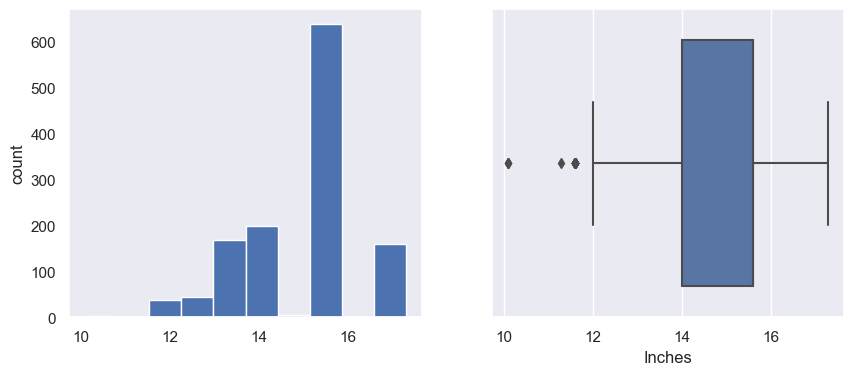

touchscreen
Skew value: 2.0


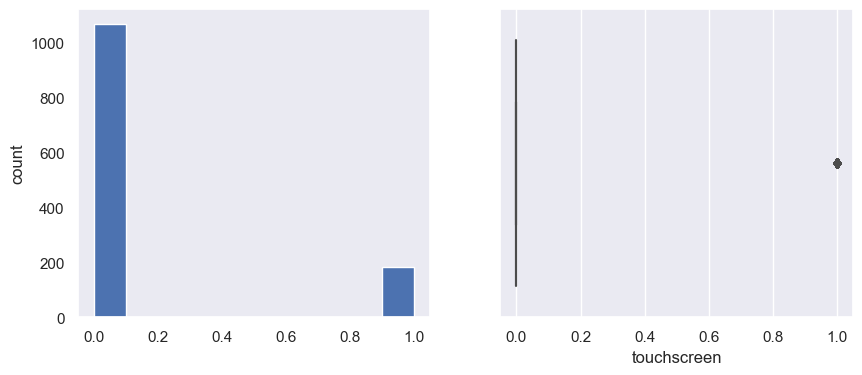

retinadisplay
Skew value: 8.41


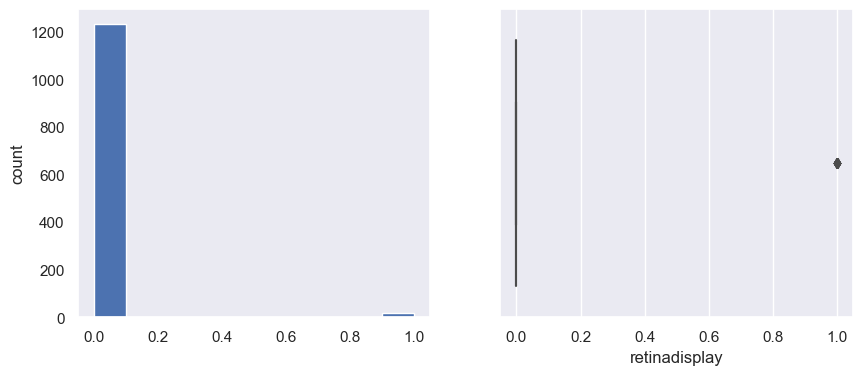

cpu_speed
Skew value: -0.83


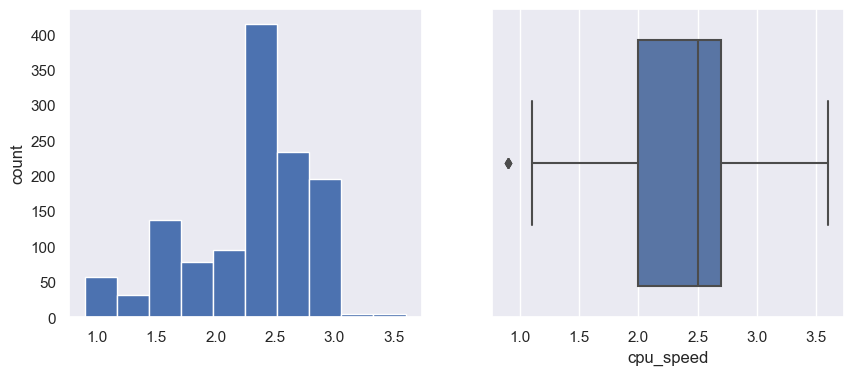

Ram
Skew value: 3.28


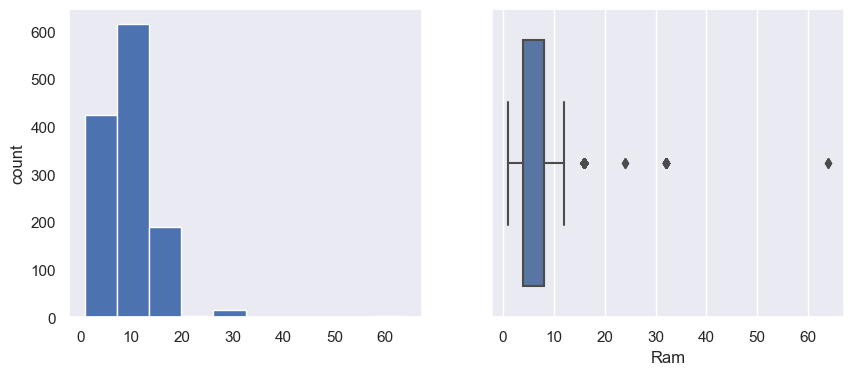

hdd
Skew value: 0.91


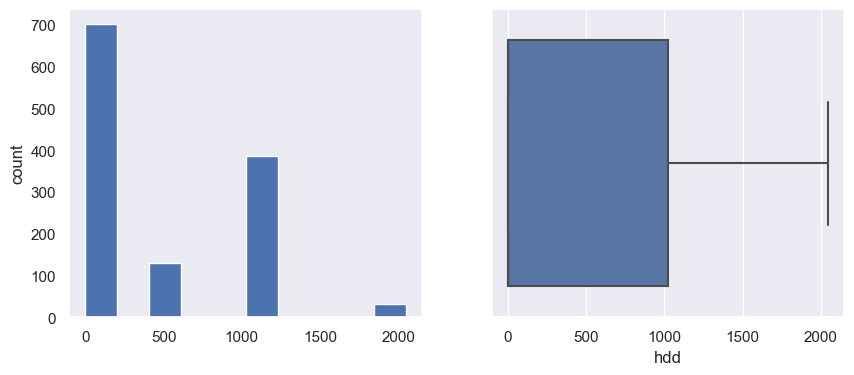

ssd
Skew value: 1.39


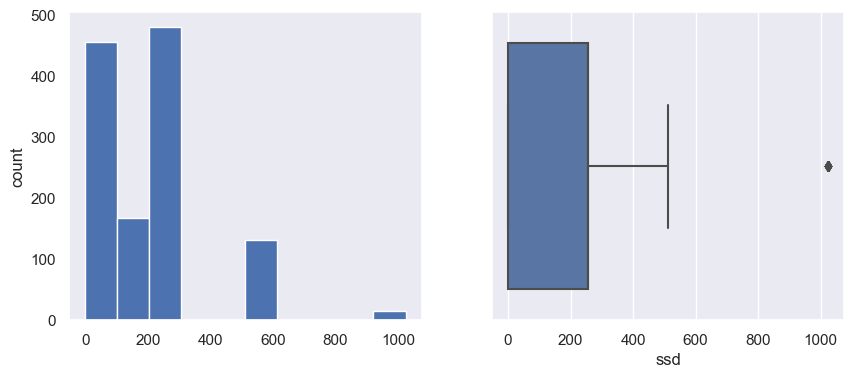

flashstorage
Skew value: 10.92


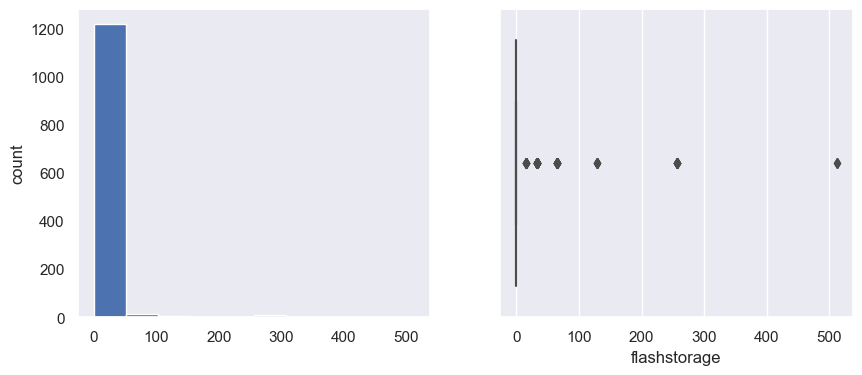

hybrid
Skew value: 10.3


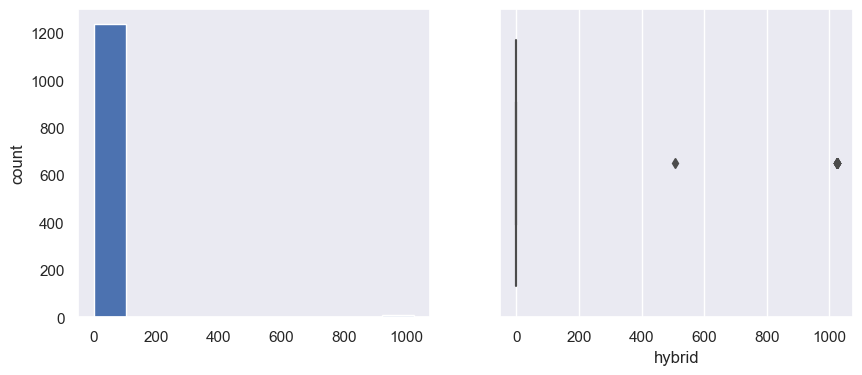

Weight_kg
Skew value: 3.06


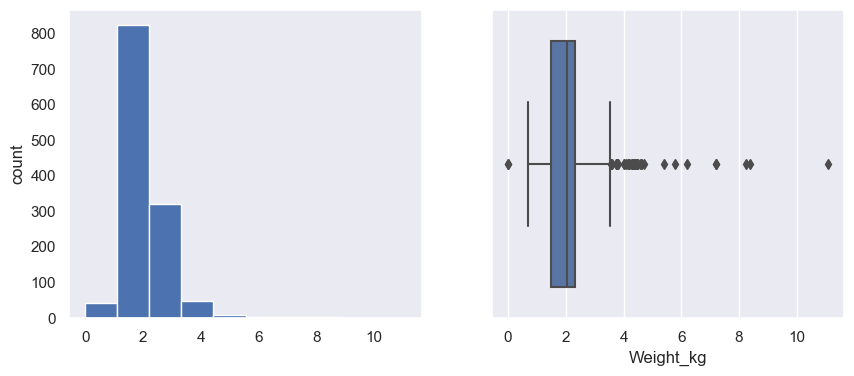

Price
Skew value: 1.56


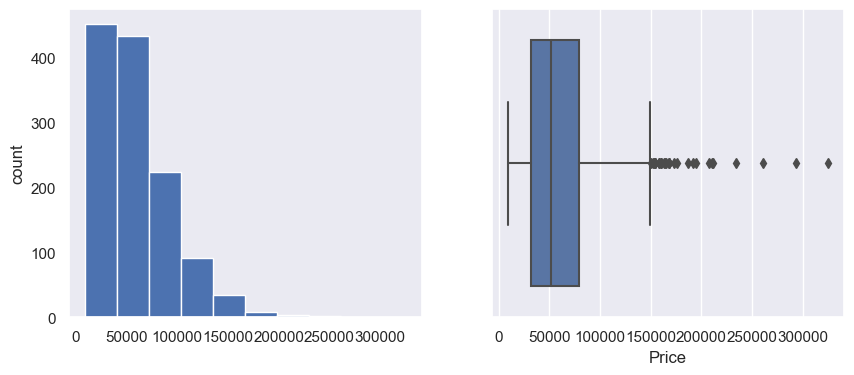

In [12]:
for col in numerical_cols:
    print(col)
    print('Skew value:', round(laptopdata[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    laptopdata[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sb.boxplot(x=laptopdata[col])
    plt.show()

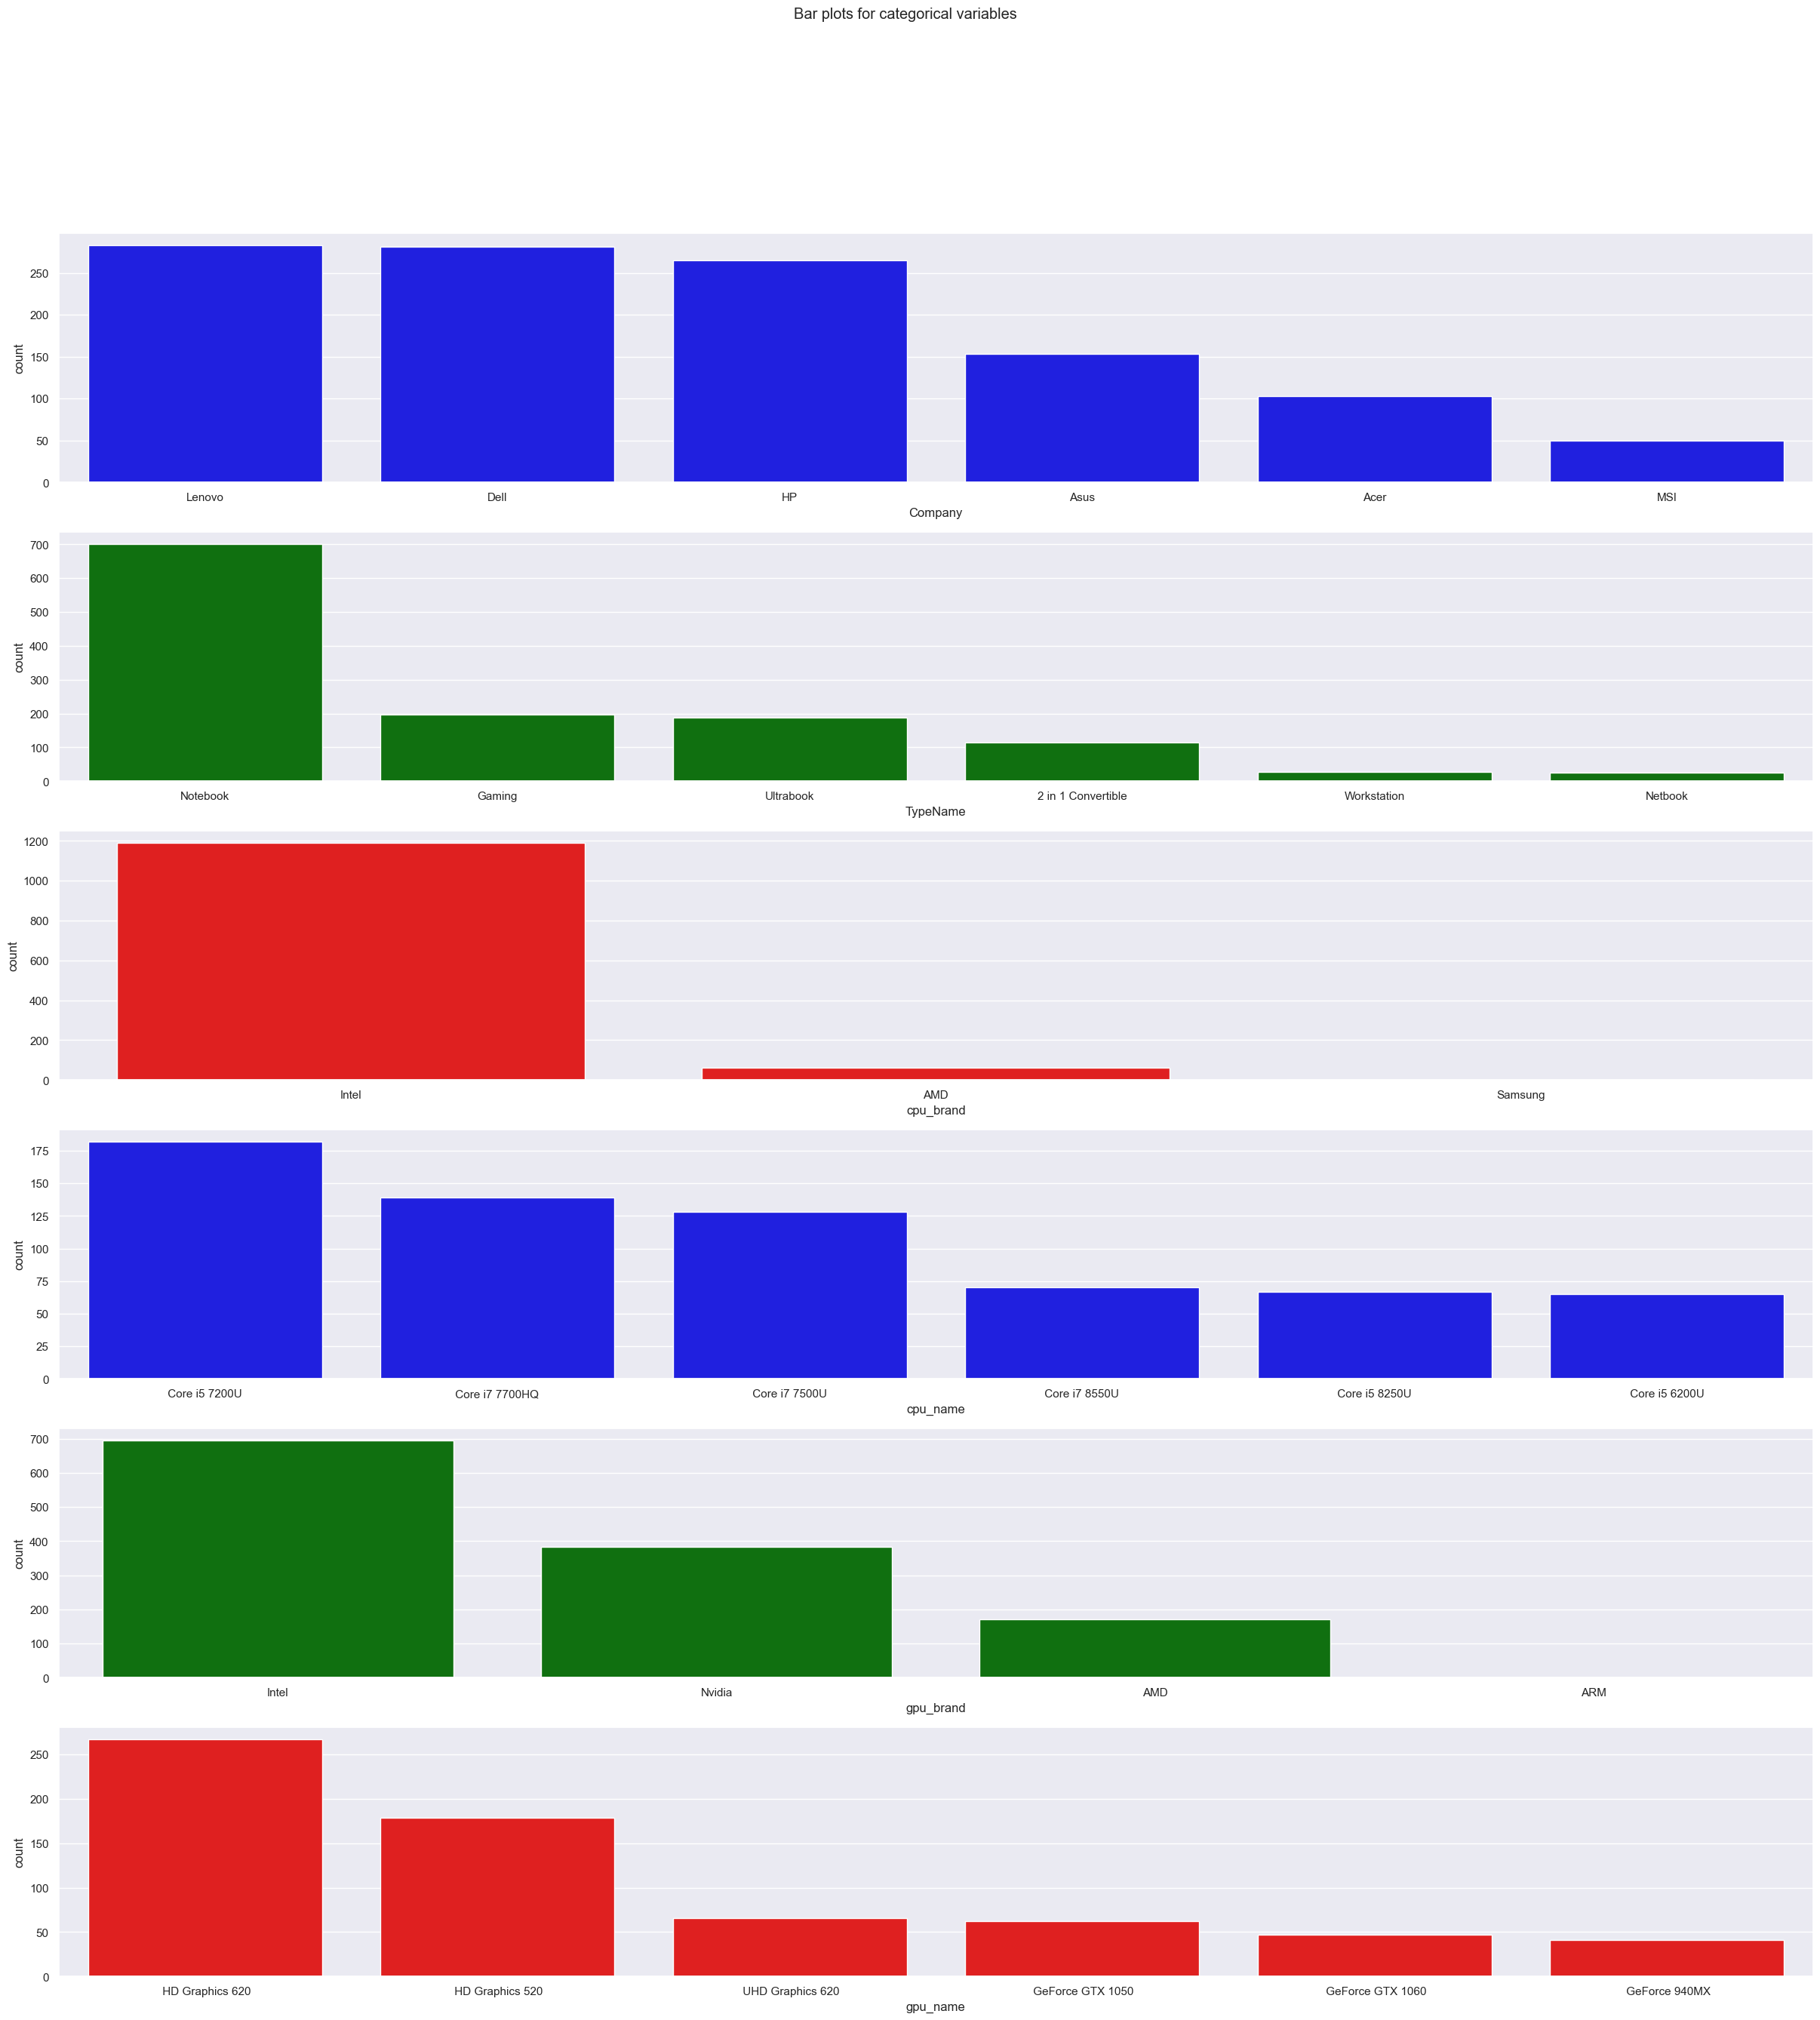

In [13]:
fig, axes = plt.subplots(6, 1, figsize = (30, 30))
fig.suptitle('Bar plots for categorical variables ')
sb.countplot(ax = axes[0], x = 'Company', data = laptopdata, color = 'blue', 
            order = laptopdata['Company'].value_counts().head(6).index);
sb.countplot(ax = axes[1], x = 'TypeName', data = laptopdata, color = 'green', 
              order = laptopdata['TypeName'].value_counts().head(6).index);
sb.countplot(ax = axes[2], x = 'cpu_brand', data =laptopdata, color = 'red', 
              order = laptopdata['cpu_brand'].value_counts().head(6).index);
sb.countplot(ax = axes[3], x = 'cpu_name', data =laptopdata, color = 'blue', 
              order = laptopdata['cpu_name'].value_counts().head(6).index);
sb.countplot(ax = axes[4], x = 'gpu_brand', data = laptopdata, color = 'green', 
              order = laptopdata['gpu_brand'].value_counts().head(6).index);
sb.countplot(ax = axes[5], x = 'gpu_name', data =laptopdata, color = 'red', 
              order = laptopdata['gpu_name'].value_counts().head(6).index);


In [14]:
num_data = pd.DataFrame(laptopdata[['Inches', 'touchscreen', 'retinadisplay', 'cpu_speed', 'Ram', 'hdd', 'ssd', 'flashstorage', 'hybrid', 'Weight_kg', 'Price']])
cat_data = pd.DataFrame(laptopdata[['Company', 'TypeName', 'cpu_brand', 'cpu_name', 'gpu_brand', 'gpu_name']])


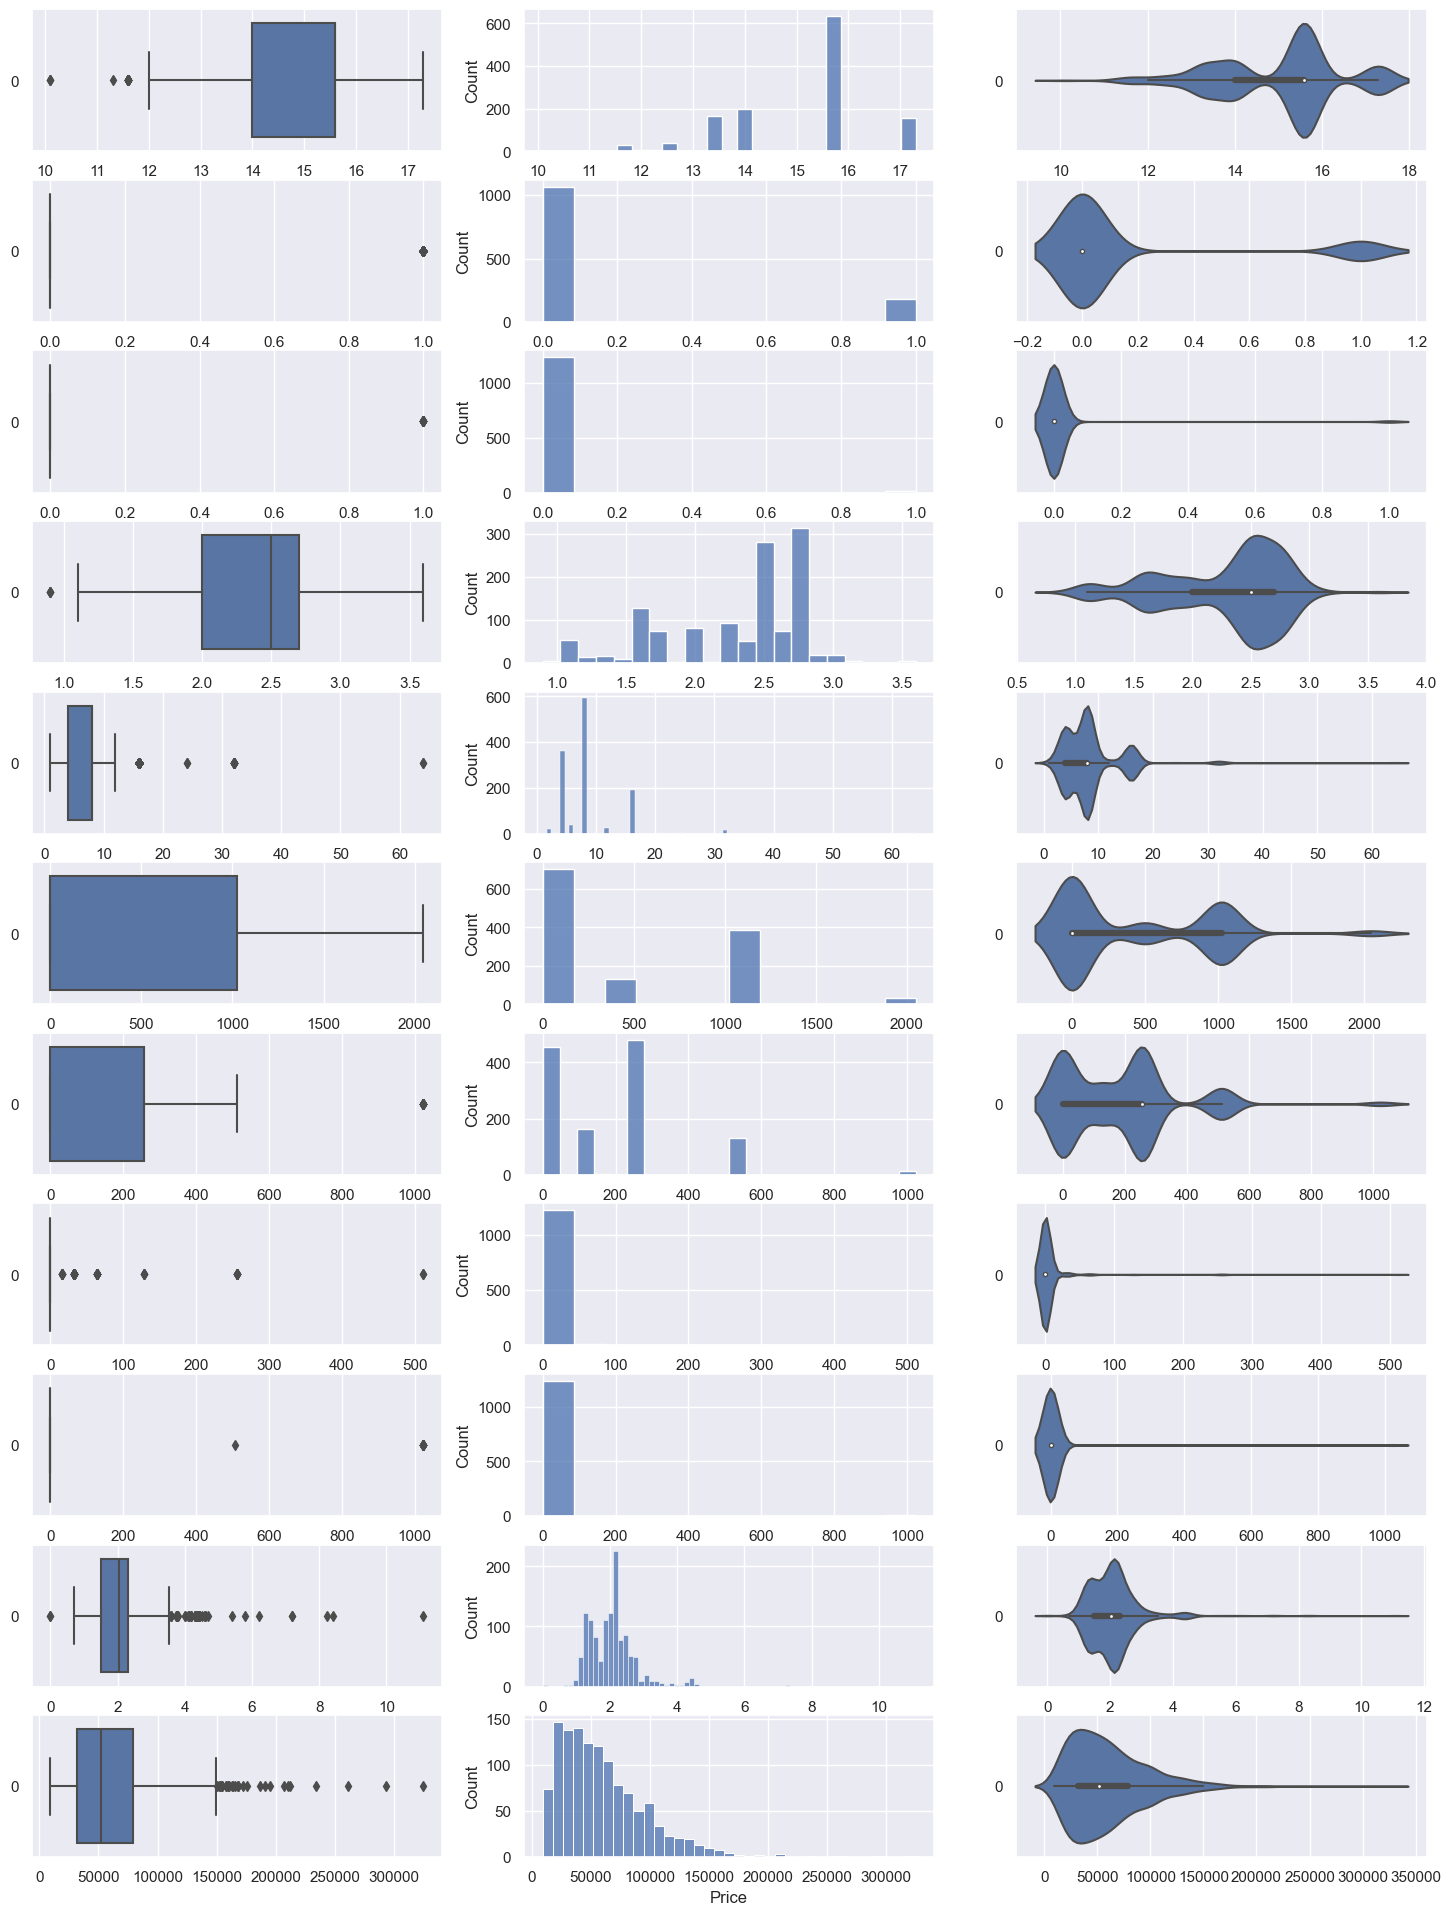

In [15]:
f, axes = plt.subplots(11, 3, figsize=(18, 24))

count = 0
for var in num_data:
    sb.boxplot(data = num_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_data[var], ax = axes[count,1])
    sb.violinplot(data = num_data[var], orient = "h", ax = axes[count,2])
    count += 1
    

<Axes: >

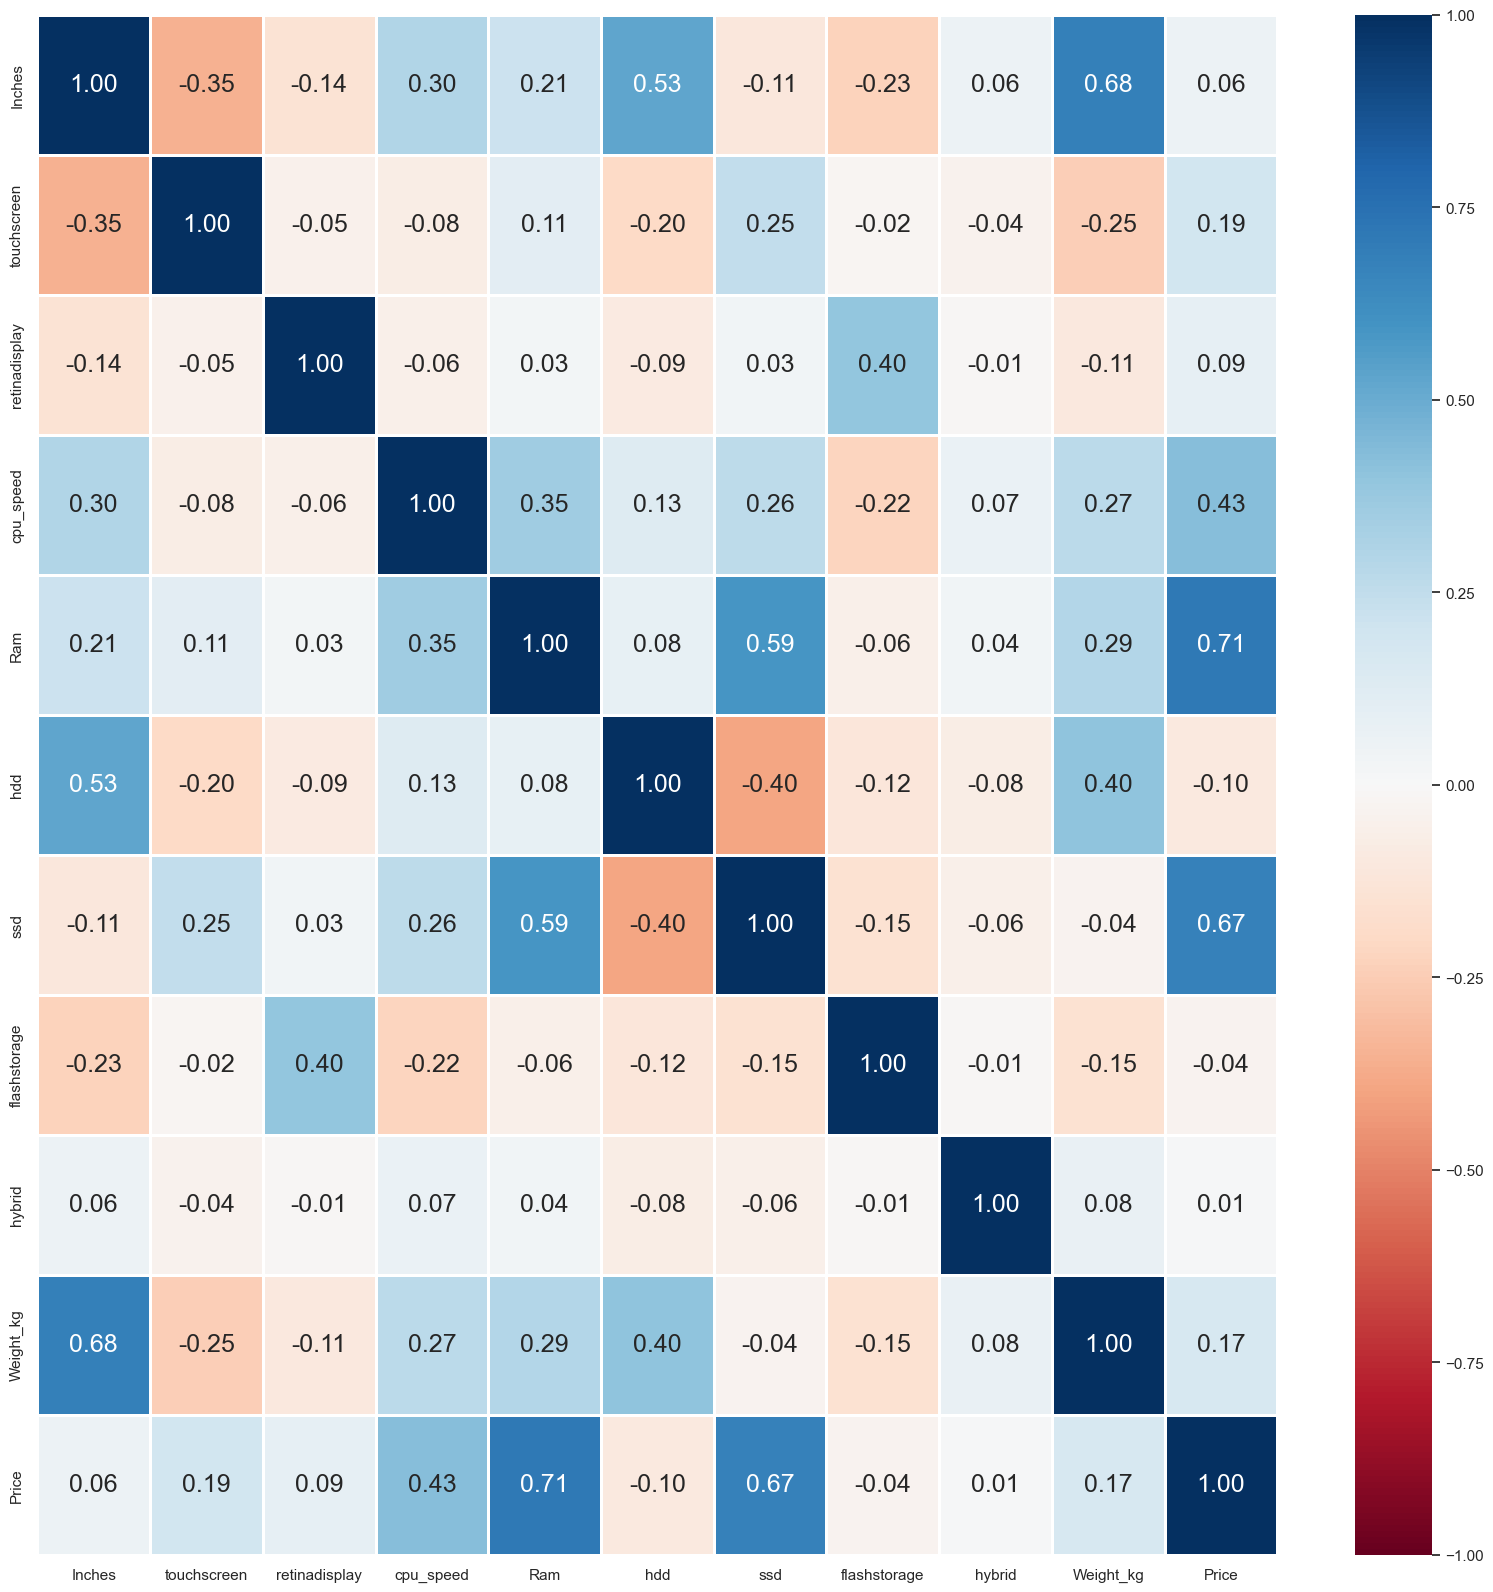

In [16]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(num_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

<h2>pricing based on companies</h2>

<Axes: xlabel='Price', ylabel='Company'>

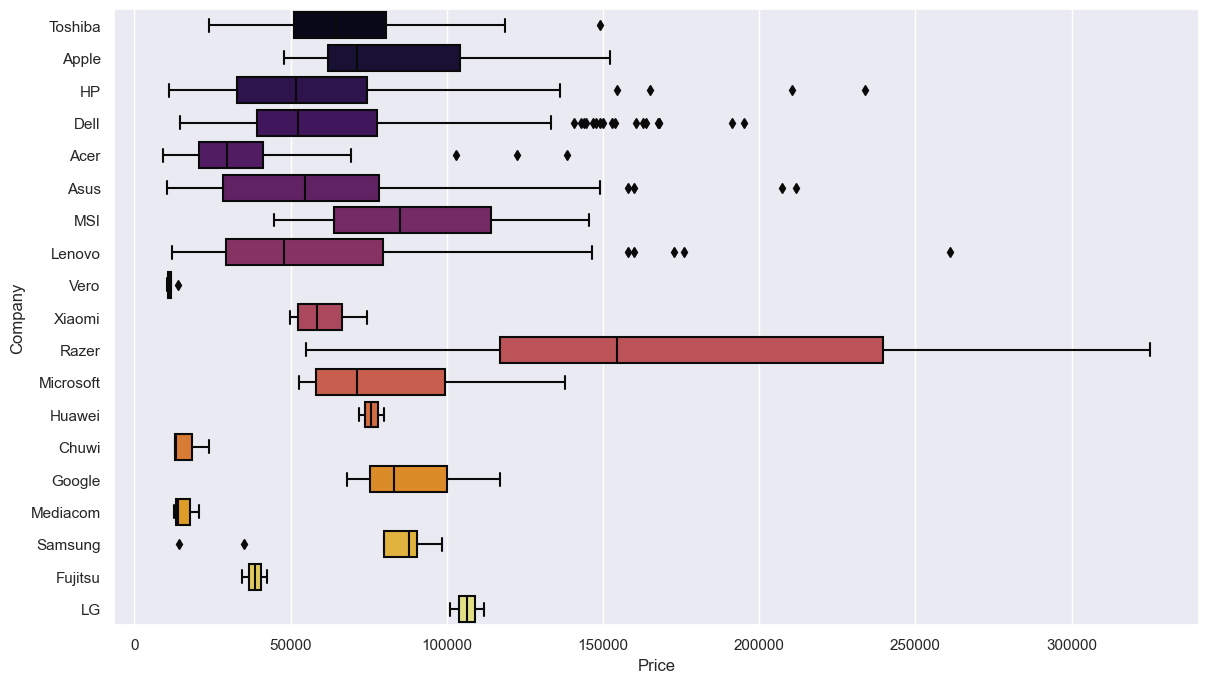

In [17]:
plt.figure(figsize=(14,8))
sb.boxplot(x = 'Price', y = 'Company' , data = laptopdata , palette = "inferno")

# use decision tree classifier for predicting company based on price

<h2>pricing based on gpu brands</h2>

<Axes: xlabel='Price', ylabel='gpu_brand'>

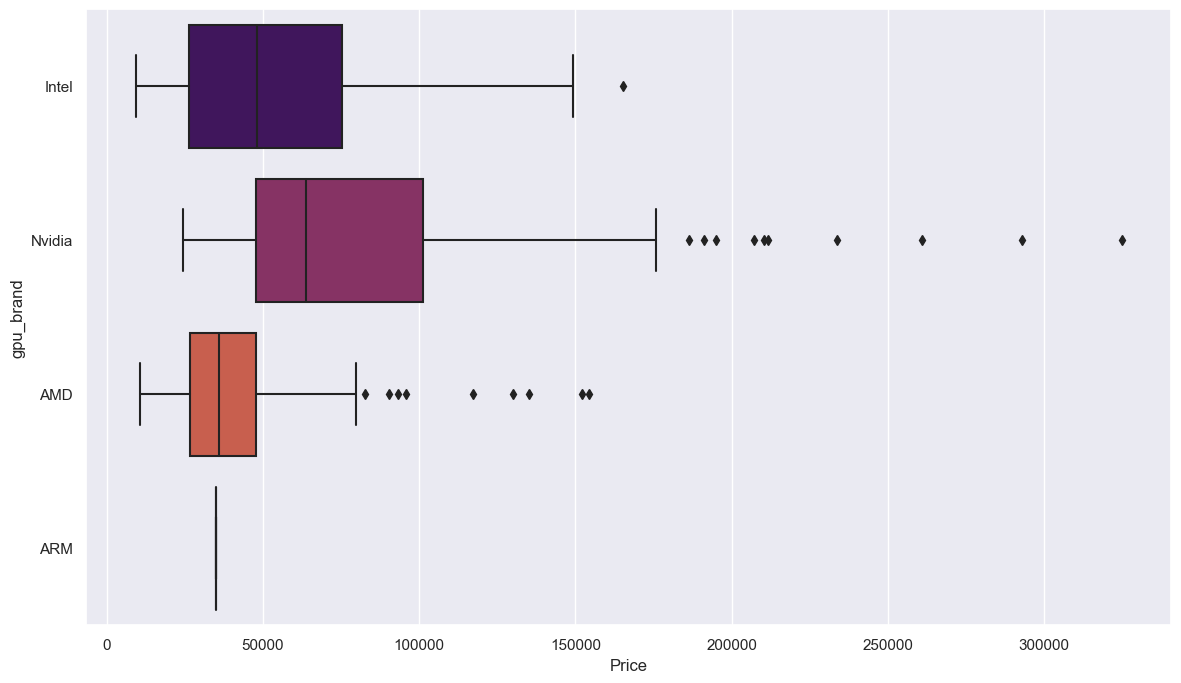

In [18]:
plt.figure(figsize=(14,8))
sb.boxplot(x = 'Price', y = 'gpu_brand' , data = laptopdata , palette = "inferno")

<h2>SVM</h2>

C:\Users\Ayushman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


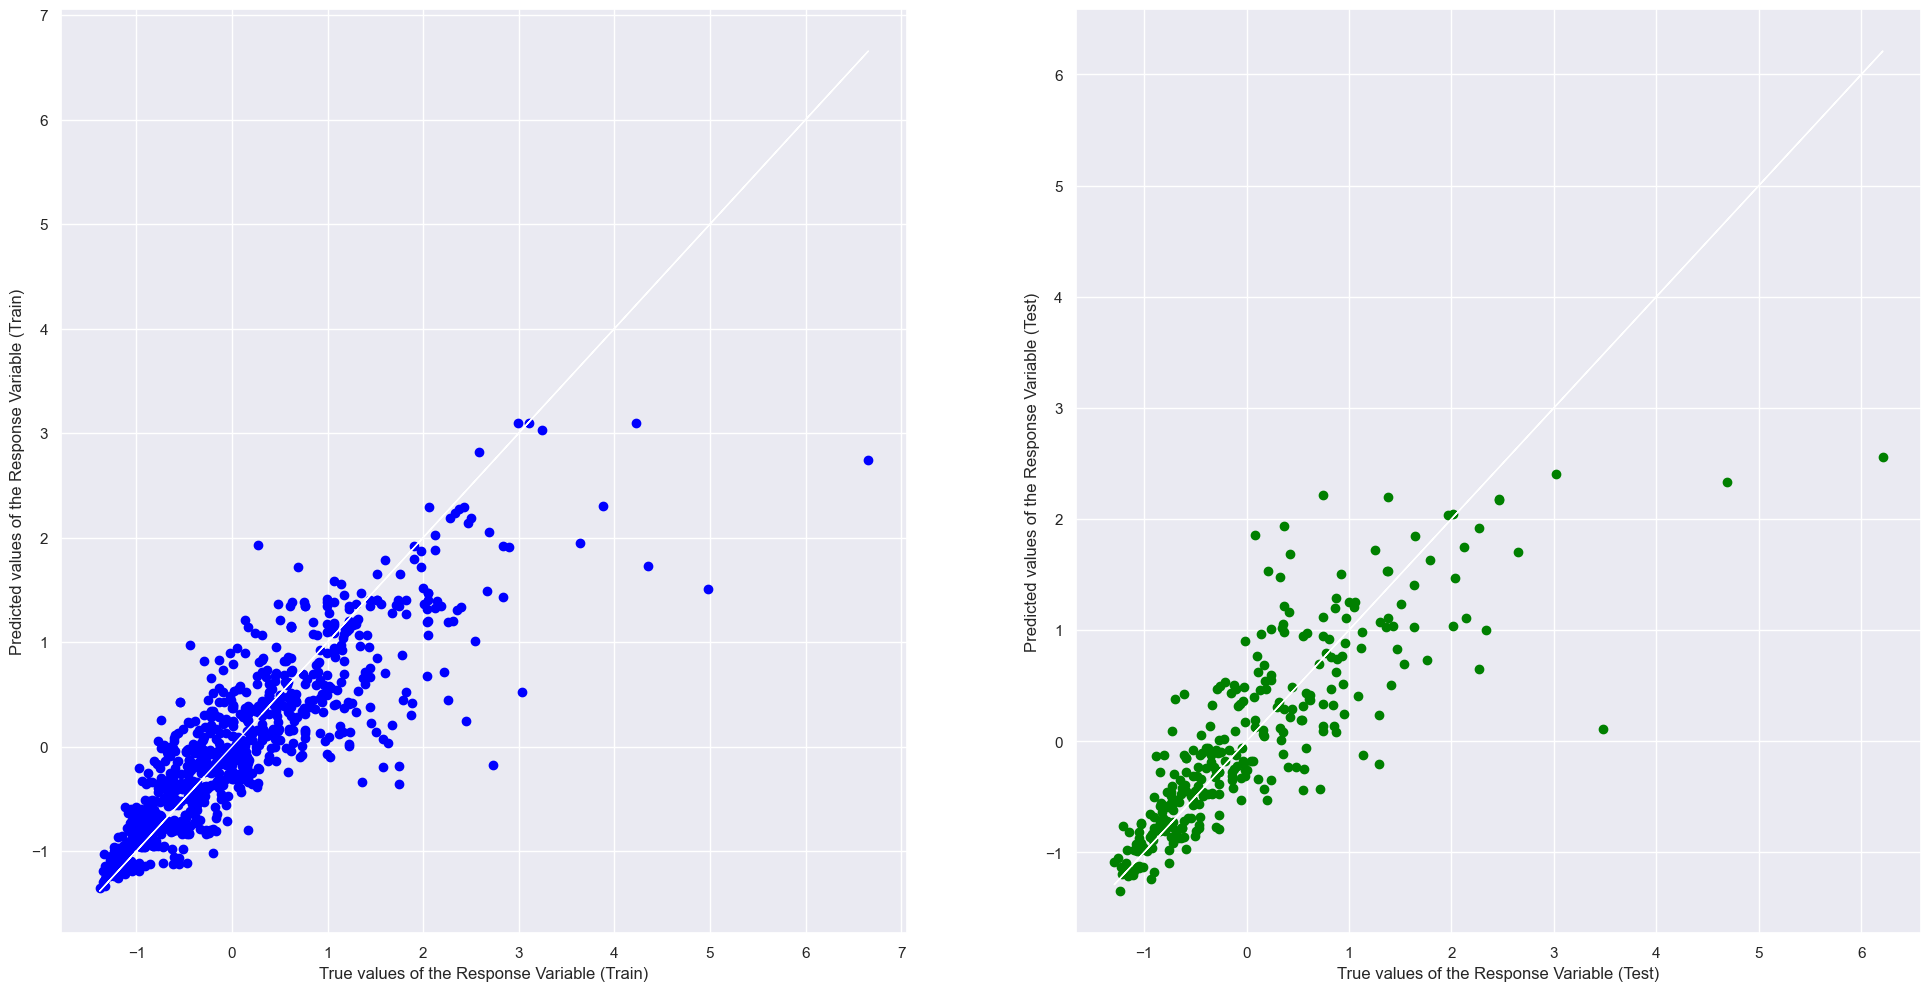

Goodness of Fit of Model 	Train Dataset
R^2 Score 	: 0.7458301146909103
Mean Squared Error (MSE) 	: 0.5041526408827882

Goodness of Fit of Model 	Test Dataset
R^2 Score 	: 0.6956320786965349
Mean Squared Error (MSE) 	: 0.5516954969033779



In [19]:
predictors = ["cpu_speed", "Ram","ssd", "Weight_kg", "Inches"]

y = pd.DataFrame(laptopdata["Price"])
X = pd.DataFrame(laptopdata[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


#Support Vector Regression using Train data 
#######
sc_X = StandardScaler()
sc_y = StandardScaler()
# sc_X_test = StandardScaler()
# sc_Y_test = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
########
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(sc_X.fit_transform(X_test))

y_test = sc_y.fit_transform(y_test)
from sklearn.metrics import r2_score

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("R^2 Score \t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred, squared=False))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("R^2 Score \t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred, squared=False))
print()

<h2>XGBOOST</h2>

RMSE of the base model: 17193.410

Goodness of Fit of Model 	Test Dataset
R^2 Score 	: 0.7663587485264439
Mean Squared Error (MSE) 	: 17193.410485185334

Goodness of Fit of Model 	Train Dataset
R^2 Score 	: 0.9226997131375143
Mean Squared Error (MSE) 	: 10480.164010851377



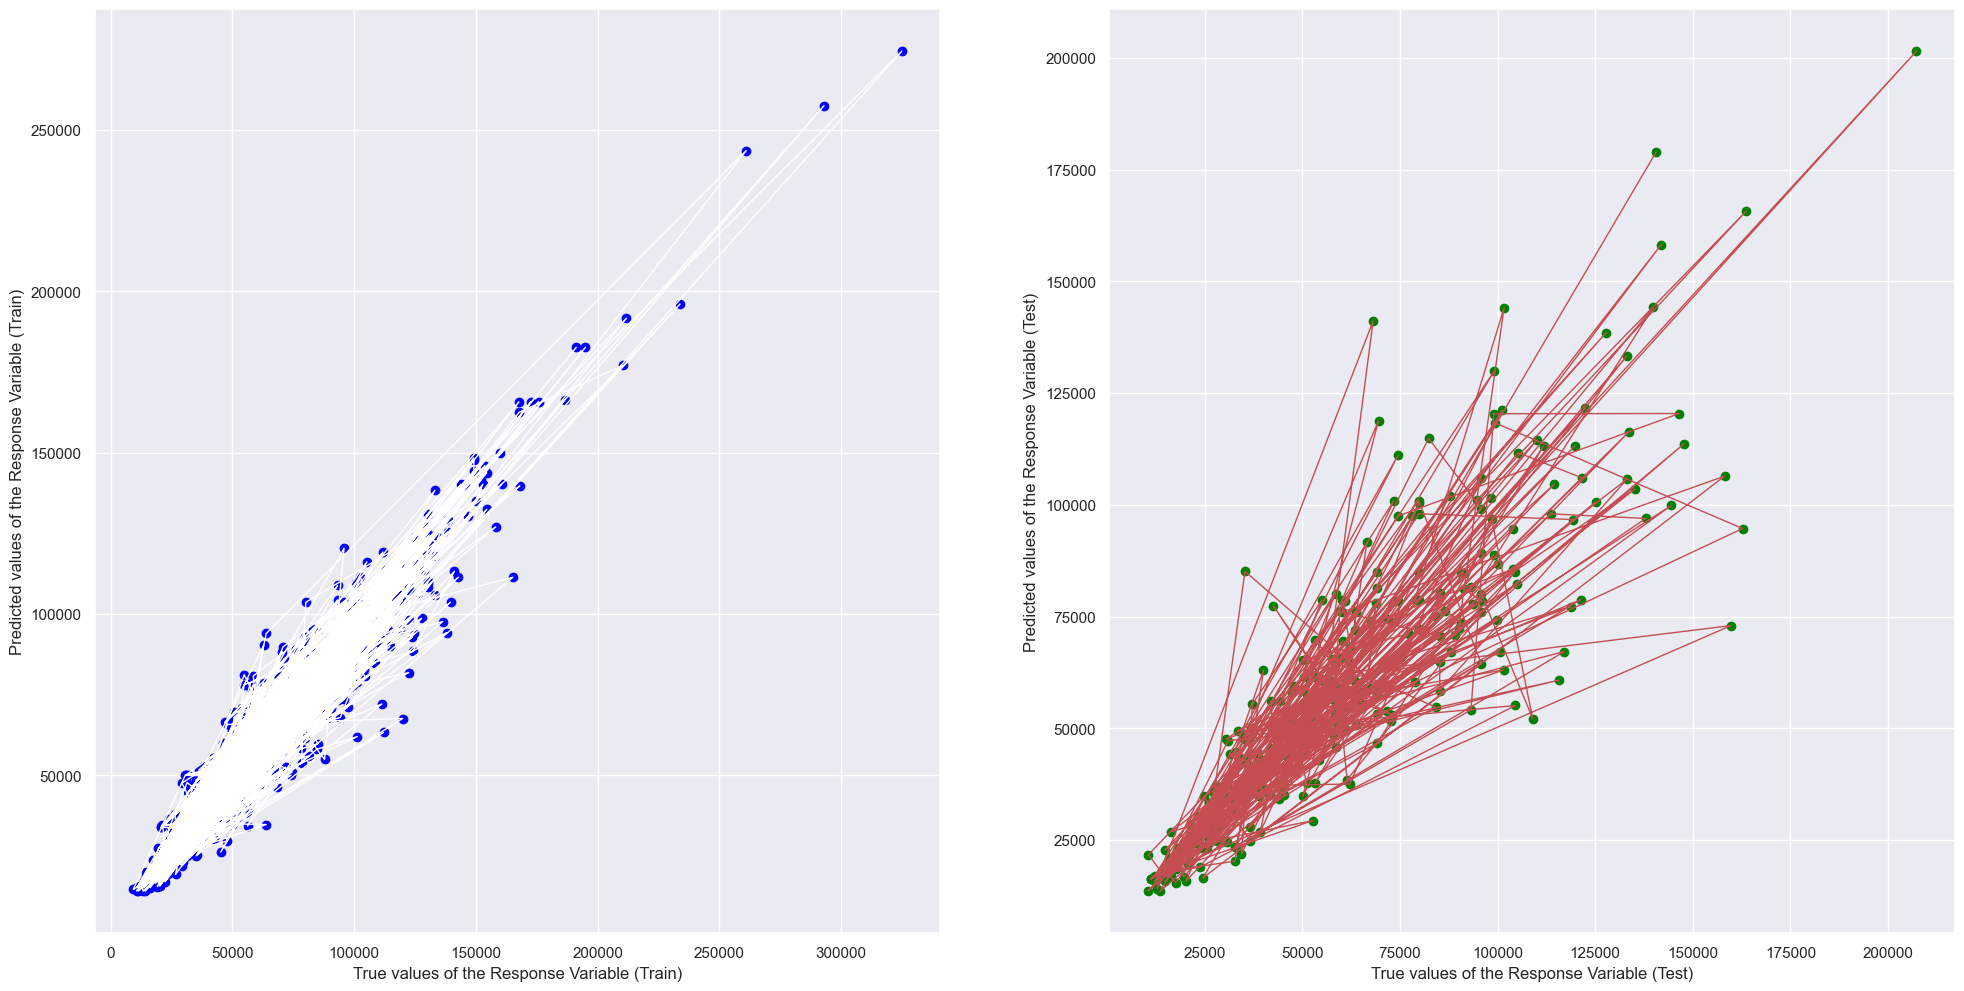

In [20]:
X, y = laptopdata.drop('Price', axis=1), laptopdata[['Price']]

categorical_cols = X.select_dtypes(exclude=np.number).columns.to_list()

for col in categorical_cols:
    X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# Define hyperparameters
params = {"objective": "reg:squarederror"}

n = 10
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)
train_preds = model.predict(dtrain_reg)
preds = model.predict(dtest_reg)

rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("R^2 Score \t:", r2_score(y_test, preds))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, preds, squared=False))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("R^2 Score \t:", r2_score(y_train, train_preds))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, train_preds, squared=False))
print()

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, train_preds, color = "blue")
axes[0].plot(y_train, train_preds, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, preds, color = "green")
axes[1].plot(y_test, preds, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()





<h2>Early Stopping to test the iterative efficiency</h2>

In [21]:
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=10000,
   evals=evals,
   verbose_eval=50,
   # Activate early stopping
   early_stopping_rounds=50
)

[0]	validation-rmse:50212.24578	train-rmse:51636.33037
[50]	validation-rmse:17192.52851	train-rmse:4414.19494
[100]	validation-rmse:17015.61482	train-rmse:2632.44635
[150]	validation-rmse:17001.09528	train-rmse:2096.72895
[200]	validation-rmse:17028.62899	train-rmse:1881.49337
[250]	validation-rmse:17014.07745	train-rmse:1776.58125
[300]	validation-rmse:17029.94601	train-rmse:1732.23401
[350]	validation-rmse:17034.93626	train-rmse:1713.34118
[400]	validation-rmse:17040.80915	train-rmse:1702.23786
[450]	validation-rmse:17040.88142	train-rmse:1698.09560
[500]	validation-rmse:17042.82247	train-rmse:1695.75355
[550]	validation-rmse:17042.02470	train-rmse:1694.73072
[600]	validation-rmse:17041.82477	train-rmse:1694.25884
[650]	validation-rmse:17041.87106	train-rmse:1693.89210
[700]	validation-rmse:17042.11653	train-rmse:1693.78349
[750]	validation-rmse:17042.56099	train-rmse:1693.74405
[800]	validation-rmse:17042.61363	train-rmse:1693.71162
[850]	validation-rmse:17042.78763	train-rmse:1693.

<h2>Cross validation to check the true performance</h2>

In [22]:
params = {"objective": "reg:squarederror"}
n = 10000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=50
)
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,51683.515114,750.827670,52081.561675,3732.479621
1,38549.335456,643.048482,39718.122610,3722.855695
2,29384.551456,559.236980,31670.215066,3800.191663
3,23075.560880,502.899239,26548.748964,3685.702499
4,18585.681455,435.290513,23438.896239,3831.723417


In [23]:
best_rmse = results['test-rmse-mean'].min()
print("TRUE PERFORMANCE OF THE MODEL:(IN TERMS OF RMSE OF THE PREDICTED PRICE):  ", best_rmse)

TRUE PERFORMANCE OF THE MODEL:(IN TERMS OF RMSE OF THE PREDICTED PRICE):   17232.58260781911


<h4>Kindly do note that the price is in Indian Rupee(INR)</h4>